In [1]:
from GNN import GNN
from run_GNN import get_optimizer, test,  train, main
from best_params import best_params_dict
from data import get_dataset
from utils import ROOT_DIR
import numpy as np
import matplotlib.pyplot as plt
opt = np.load('config.npy',allow_pickle=True).tolist()


def plot_state(init_state,final_state):
    fig, ax = plt.subplots(2)
    ax[0].scatter(init_state[:,0].cpu().numpy(),init_state[:,1].cpu().numpy())
    ax[1].scatter(final_state[:,0].cpu().numpy(),final_state[:,1].cpu().numpy())
    ax[1].set_xlim(-3,3)
    ax[1].set_ylim(-3,3)
    ax[0].set_xlim(-3,3)
    ax[0].set_ylim(-3,3)
    # plt.xlim(-1,1)

/home/kai/miniconda3/envs/ACMP/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## GCN +Neural ODE

In [2]:
opt['function'] = 'GCN'
opt['time'] = 3
_,_,_,init_state,final_state = main(opt)


True
cuda:0


using GCN
using GCN
using Cora dataset
Epoch: 001, Runtime 1.243749, Loss 1.992528, forward nfe 44, backward nfe 0, Train: 0.6429, Val: 0.4426, Test: 0.4404, Best time: 1.5358
Epoch: 002, Runtime 0.412426, Loss 1.274630, forward nfe 552, backward nfe 0, Train: 0.8000, Val: 0.6890, Test: 0.7061, Best time: 3.7680
Epoch: 003, Runtime 0.395289, Loss 0.679188, forward nfe 1156, backward nfe 0, Train: 0.8000, Val: 0.6890, Test: 0.7061, Best time: 3.0000
Epoch: 004, Runtime 0.343189, Loss 0.564593, forward nfe 1766, backward nfe 0, Train: 0.9143, Val: 0.7603, Test: 0.7583, Best time: 4.9796
Epoch: 005, Runtime 0.378074, Loss 0.306178, forward nfe 2298, backward nfe 0, Train: 0.9714, Val: 0.7941, Test: 0.8038, Best time: 4.9055
Epoch: 006, Runtime 0.363142, Loss 0.102398, forward nfe 2884, backward nfe 0, Train: 0.9714, Val: 0.7941, Test: 0.8038, Best time: 3.0000
Epoch: 007, Runtime 0.380083, Loss 0.135409, forward nfe 3410, backward nfe 0, Train: 0.9714, Val: 0.7941, Test: 0.8038, Best time

## Oversmoothing problem

In [2]:
opt['max_nfe'] = 10000
opt['function'] = 'GCN'
opt['time'] = 30
_,_,_,init_state,final_state  = main(opt)

True
cuda:0
using GCN
using GCN
using Cora dataset
Epoch: 001, Runtime 6.077875, Loss 167466205184.000000, forward nfe 3290, backward nfe 0, Train: 0.1714, Val: 0.1647, Test: 0.1664, Best time: 0.5574
Epoch: 002, Runtime 4.510000, Loss 3535523807232.000000, forward nfe 7110, backward nfe 0, Train: 0.2571, Val: 0.3463, Test: 0.3419, Best time: 8.7825
Epoch: 003, Runtime 4.400140, Loss 4621555728384.000000, forward nfe 10834, backward nfe 0, Train: 0.2571, Val: 0.3463, Test: 0.3419, Best time: 30.0000
Epoch: 004, Runtime 4.203169, Loss 3429175918592.000000, forward nfe 14294, backward nfe 0, Train: 0.2571, Val: 0.3463, Test: 0.3419, Best time: 30.0000
Epoch: 005, Runtime 4.025541, Loss 3354903183360.000000, forward nfe 17658, backward nfe 0, Train: 0.2571, Val: 0.3463, Test: 0.3419, Best time: 30.0000
Epoch: 006, Runtime 4.323045, Loss 3205122228224.000000, forward nfe 21820, backward nfe 0, Train: 0.2571, Val: 0.3463, Test: 0.3419, Best time: 30.0000
Epoch: 007, Runtime 2.363302, Loss 2

Plot the evolution of feature. The first coloum is the inital state and the second coloum is feature when T = 30.


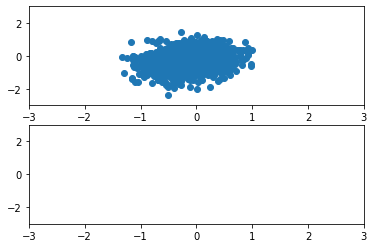

In [5]:
plot_state(init_state,final_state)
# print(final_state.mean())

## ACMP

In [6]:
opt['function'] = 'ACMP'
opt['method'] = 'dopri5'
opt['time'] = 18
_,_,test_acc,init_state,final_state = main(opt)

True
cuda:0
using ACMP
using ACMP
using Cora dataset
Epoch: 001, Runtime 0.183749, Loss 1.945443, forward nfe 56, backward nfe 0, Train: 0.6214, Val: 0.3713, Test: 0.4081, Best time: 0.0967
Epoch: 002, Runtime 0.191098, Loss 1.777301, forward nfe 252, backward nfe 0, Train: 0.8929, Val: 0.6875, Test: 0.6978, Best time: 5.6603
Epoch: 003, Runtime 0.213445, Loss 1.476168, forward nfe 442, backward nfe 0, Train: 0.9071, Val: 0.8096, Test: 0.8237, Best time: 33.5121
Epoch: 004, Runtime 0.206426, Loss 1.126723, forward nfe 650, backward nfe 0, Train: 0.9286, Val: 0.8243, Test: 0.8377, Best time: 30.9228
Epoch: 005, Runtime 0.216104, Loss 0.816678, forward nfe 864, backward nfe 0, Train: 0.9286, Val: 0.8243, Test: 0.8377, Best time: 18.0000
Epoch: 006, Runtime 0.212647, Loss 0.594055, forward nfe 1090, backward nfe 0, Train: 0.9286, Val: 0.8257, Test: 0.8320, Best time: 44.6247
Epoch: 007, Runtime 0.239701, Loss 0.430222, forward nfe 1334, backward nfe 0, Train: 0.9286, Val: 0.8390, Test: 0.

even when T = 50, ACMP is not suffer with oversommthing problem and maintain a good performance

In [ ]:
opt['function'] = 'ACMP'
opt['method'] = 'dopri5'
opt['time'] = 50
_,_,test_acc,init_state,final_state = main(opt)



True
cuda:0
using ACMP
using ACMP
using Cora dataset
Epoch: 001, Runtime 0.608459, Loss 1.947030, forward nfe 116, backward nfe 0, Train: 0.2500, Val: 0.1860, Test: 0.1921, Best time: 0.0958
Epoch: 002, Runtime 0.643505, Loss 1.826324, forward nfe 522, backward nfe 0, Train: 0.8286, Val: 0.7985, Test: 0.7724, Best time: 10.8699
Epoch: 003, Runtime 0.715671, Loss 1.582338, forward nfe 958, backward nfe 0, Train: 0.8286, Val: 0.7985, Test: 0.7724, Best time: 50.0000
Epoch: 004, Runtime 0.740445, Loss 1.353877, forward nfe 1436, backward nfe 0, Train: 0.8286, Val: 0.7985, Test: 0.7724, Best time: 50.0000
Epoch: 005, Runtime 0.861322, Loss 1.107271, forward nfe 1956, backward nfe 0, Train: 0.8286, Val: 0.7985, Test: 0.7724, Best time: 50.0000
Epoch: 006, Runtime 0.919091, Loss 0.968606, forward nfe 2524, backward nfe 0, Train: 0.9071, Val: 0.8316, Test: 0.7964, Best time: 21.4227
Epoch: 007, Runtime 0.966079, Loss 0.746226, forward nfe 3140, backward nfe 0, Train: 0.9071, Val: 0.8316, Test

## Heterophilic Dataset

Texas homophily level: 0.11

In [7]:
opt['dataset'] = 'texas'

opt['geom_gcn_splits'] = True

opt['function'] = 'GCN'

opt['time'] = 5

opt['beta'] = 0.0

_,_,test_acc,init_state,final_state = main(opt)

True
torch.Size([183, 10])
cuda:0
using GCN
using GCN
using texas dataset
Epoch: 001, Runtime 0.439576, Loss 8.544854, forward nfe 86, backward nfe 0, Train: 0.3793, Val: 0.1695, Test: 0.1892, Best time: 2.1358
Epoch: 002, Runtime 0.483616, Loss 82.503036, forward nfe 456, backward nfe 0, Train: 0.5172, Val: 0.4915, Test: 0.6216, Best time: 5.0000
Epoch: 003, Runtime 0.510602, Loss 115.690140, forward nfe 838, backward nfe 0, Train: 0.5172, Val: 0.4915, Test: 0.6216, Best time: 5.0000
Epoch: 004, Runtime 0.507909, Loss 91.526627, forward nfe 1220, backward nfe 0, Train: 0.5172, Val: 0.4915, Test: 0.6216, Best time: 5.0000
Epoch: 005, Runtime 0.507847, Loss 45.897354, forward nfe 1602, backward nfe 0, Train: 0.5172, Val: 0.4915, Test: 0.6216, Best time: 5.0000
Epoch: 006, Runtime 0.505346, Loss 17.459764, forward nfe 1984, backward nfe 0, Train: 0.7011, Val: 0.5424, Test: 0.5946, Best time: 0.0392
Epoch: 007, Runtime 0.504986, Loss 4.895363, forward nfe 2366, backward nfe 0, Train: 0.70

In [ ]:
opt['dataset'] = 'texas'
# opt['not_lcc'] = 'False'
opt['function'] = 'ACMP'

opt['time'] = 5

opt['beta'] = 0.5 #0.0 to 0.5

_,_,test_acc,init_state,final_state = main(opt)

True
torch.Size([183, 10])
cuda:0
using ACMP
using ACMP
using texas dataset
Epoch: 001, Runtime 0.109777, Loss 1.627865, forward nfe 38, backward nfe 0, Train: 0.8736, Val: 0.7627, Test: 0.8378, Best time: 3.2194
Epoch: 002, Runtime 0.119359, Loss 1.484387, forward nfe 156, backward nfe 0, Train: 0.8736, Val: 0.7627, Test: 0.8378, Best time: 5.0000
Epoch: 003, Runtime 0.117156, Loss 1.219113, forward nfe 286, backward nfe 0, Train: 0.8506, Val: 0.7797, Test: 0.8919, Best time: 2.7987
Epoch: 004, Runtime 0.125548, Loss 0.976388, forward nfe 416, backward nfe 0, Train: 0.8506, Val: 0.7797, Test: 0.8919, Best time: 5.0000
Epoch: 005, Runtime 0.138546, Loss 0.713359, forward nfe 546, backward nfe 0, Train: 0.8506, Val: 0.7797, Test: 0.8919, Best time: 5.0000
Epoch: 006, Runtime 0.121894, Loss 0.548220, forward nfe 682, backward nfe 0, Train: 0.8506, Val: 0.7797, Test: 0.8919, Best time: 5.0000
Epoch: 007, Runtime 0.122652, Loss 0.456125, forward nfe 818, backward nfe 0, Train: 0.8506, Val:

# $\beta$ ablation study

True
torch.Size([183, 10])
cuda:0
using ACMP
using ACMP
using texas dataset
Epoch: 001, Runtime 0.183041, Loss 1.662452, forward nfe 32, backward nfe 0, Train: 0.6322, Val: 0.5593, Test: 0.7027, Best time: 1.8629
Epoch: 002, Runtime 0.196909, Loss 1.396572, forward nfe 138, backward nfe 0, Train: 0.6322, Val: 0.5593, Test: 0.7027, Best time: 5.0000
Epoch: 003, Runtime 0.255645, Loss 1.132694, forward nfe 274, backward nfe 0, Train: 0.6322, Val: 0.5593, Test: 0.7027, Best time: 5.0000
Epoch: 004, Runtime 0.196516, Loss 0.959510, forward nfe 422, backward nfe 0, Train: 0.8621, Val: 0.5932, Test: 0.6757, Best time: 0.0497
Epoch: 005, Runtime 0.252304, Loss 0.798165, forward nfe 576, backward nfe 0, Train: 0.8621, Val: 0.5932, Test: 0.6757, Best time: 5.0000
Epoch: 006, Runtime 0.252496, Loss 0.628993, forward nfe 730, backward nfe 0, Train: 0.8621, Val: 0.5932, Test: 0.6757, Best time: 5.0000
Epoch: 007, Runtime 0.258773, Loss 0.480841, forward nfe 890, backward nfe 0, Train: 0.8621, Val:

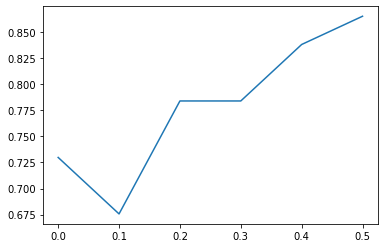

In [10]:
opt['dataset'] = 'texas'

opt['function'] = 'ACMP'
opt['epoch'] = 50
opt['time'] = 5

opt['beta'] = 0.5
test_acc = []
for beta in [0.0,0.1,0.2,0.3,0.4,0.5]:
    opt['beta'] = beta
    _,_,test_acc_,_,_ = main(opt)
    test_acc.append(test_acc_)

import matplotlib.pyplot as plt
plt.plot( [0.0,0.1,0.2,0.3,0.4,0.5],test_acc)

The baseline model and code is from twitter-research: https://github.com/twitter-research/graph-neural-pde



Chamberlain, Ben, et al. "Grand: Graph neural diffusion." International Conference on Machine Learning. PMLR, 2021.
